Latitude Range: 27 - 37
Correlation coefficient: -0.73
Slope of trend line: -11.35 +- 1.25 m^2/C
One Quarter lagged temperature when kelp area is zero: 21.22 +- 3.07C
Correlation coefficient: -0.35
Slope of trend line: -5.06 +- 1.61 m^2/C
Data/kelp_metrics_27_37_lag_correlation.png


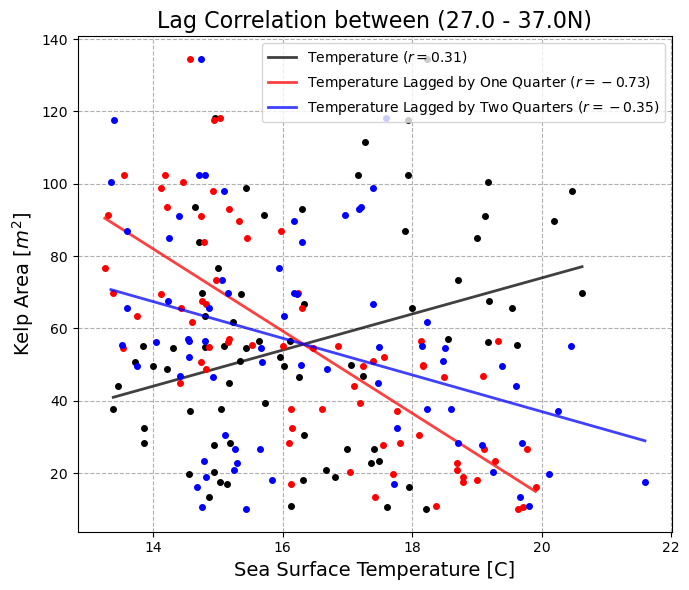

In [2]:
import os
import joblib
import argparse
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

def lag_correlation(kelp_metrics):
    # find lat limits
    lower = np.min(kelp_metrics['lat'])
    upper = np.max(kelp_metrics['lat'])

    # find unique times, compute mean + stdev of bins, and plot
    unique_times = np.unique(kelp_metrics['time'])
    mean_temp = []
    mean_kelp = []
    std_temp = []
    mean_temp_lag = []
    std_temp_lag = []
    mean_temp_lag2 = []
    std_temp_lag2 = []

    # compute mean and std of temperature and kelp area
    for t in unique_times:
        mask = kelp_metrics['time'] == t
        mean_temp.append(np.mean(kelp_metrics['temp'][mask]))
        mean_kelp.append(np.mean(kelp_metrics['kelp'][mask]))
        std_temp.append(np.std(kelp_metrics['temp'][mask]))
        mean_temp_lag.append(np.mean(kelp_metrics['temp_lag'][mask]))
        std_temp_lag.append(np.std(kelp_metrics['temp_lag'][mask]))
        mean_temp_lag2.append(np.mean(kelp_metrics['temp_lag2'][mask]))
        std_temp_lag2.append(np.std(kelp_metrics['temp_lag2'][mask]))

    # convert to numpy arrays
    mean_temp = np.array(mean_temp)
    mean_kelp = np.array(mean_kelp)
    std_temp = np.array(std_temp)
    mean_temp_lag = np.array(mean_temp_lag)
    std_temp_lag = np.array(std_temp_lag)
    mean_temp_lag2 = np.array(mean_temp_lag2)
    std_temp_lag2 = np.array(std_temp_lag2)

    fig, ax = plt.subplots(figsize=(7,6))
    ax.plot(mean_temp-273.15, mean_kelp,  'o', color='black', markersize=4)
    # plot x-axis errorbar
    #ax.errorbar(mean_temp-273.15, mean_kelp, xerr=std_temp, color='black', marker='o', ls='none', ecolor='black', alpha=0.5)
    
    # measure trend line
    A = np.vstack([mean_temp-273.15, np.ones(len(mean_temp))]).T
    res = OLS(mean_kelp, A).fit()
    m,b = res.params[0], res.params[1]
    x = np.linspace(np.min(mean_temp-273.15), np.max(mean_temp-273.15), 100)
    corrcoeff = np.corrcoef(mean_temp-273.15, mean_kelp)[0,1]
    #print(f"Correlation coefficient: {corrcoeff:.2f}")
    ax.plot(x, m*x+b, 'k-',alpha=0.75,lw=2,label=f'Temperature ($r={corrcoeff:.2f}$)')
    #print(f"Slope of trend line: {m:.2f} +- {res.bse[0]:.2f} m^2/C")
    # estimate x when y = 0
    x0 = -b/m
    # perform monte carlo simulation to estimate error in x0
    x0s = []
    for i in range(1000):
        # sample from normal distribution
        m_sample = np.random.normal(m, res.bse[0])
        b_sample = np.random.normal(b, res.bse[1])
        # estimate x when y = 0
        x0_sample = -b_sample/m_sample
        x0s.append(x0_sample)
    #print(f"Temperature when kelp area is zero: {x0:.2f} +- {np.std(x0s):.2f}C")


    # temp lagged by one quarter
    ax.plot(mean_temp_lag[1:]-273.15, mean_kelp[1:],  'o', color='red', markersize=4)
    # plot x-axis errorbar
    #ax.errorbar(mean_temp_lag[1:]-273.15, mean_kelp[1:], xerr=std_temp_lag[1:], color='red', marker='o', ls='none', ecolor='red', alpha=0.5)

    # measure trend line
    A = np.vstack([mean_temp_lag[1:]-273.15, np.ones(len(mean_temp_lag[1:]))]).T
    res = OLS(mean_kelp[1:], A).fit()
    m,b = res.params[0], res.params[1]
    x = np.linspace(np.min(mean_temp_lag[1:]-273.15), np.max(mean_temp_lag[1:]-273.15), 100)
    corrcoeff = np.corrcoef(mean_temp_lag[1:]-273.15, mean_kelp[1:])[0,1]
    print(f"Correlation coefficient: {corrcoeff:.2f}")
    ax.plot(x, m*x+b, 'r-',alpha=0.75,lw=2,label=r'Temperature Lagged by One Quarter ($r=%.2f$)'%corrcoeff)
    print(f"Slope of trend line: {m:.2f} +- {res.bse[0]:.2f} m^2/C")
    # estimate x when y = 0
    x0 = -b/m
    # perform monte carlo simulation to estimate error in x0
    x0s = []
    for i in range(1000):
        # sample from normal distribution
        m_sample = np.random.normal(m, res.bse[0])
        b_sample = np.random.normal(b, res.bse[1])
        # estimate x when y = 0
        x0_sample = -b_sample/m_sample
        x0s.append(x0_sample)
    print(f"One Quarter lagged temperature when kelp area is zero: {x0:.2f} +- {np.std(x0s):.2f}C")


    # temp lagged by two quarters
    ax.plot(mean_temp_lag2[2:]-273.15, mean_kelp[2:],  'o', color='blue', markersize=4)
    # plot x-axis errorbar
    #ax.errorbar(mean_temp_lag2[2:]-273.15, mean_kelp[2:], xerr=std_temp_lag2[2:], color='blue', marker='o', ls='none', ecolor='blue', alpha=0.5)
    
    # measure trend line
    A = np.vstack([mean_temp_lag2[2:]-273.15, np.ones(len(mean_temp_lag2[2:]))]).T
    res = OLS(mean_kelp[2:], A).fit()
    m,b = res.params[0], res.params[1]
    x = np.linspace(np.min(mean_temp_lag2[2:]-273.15), np.max(mean_temp_lag2[2:]-273.15), 100)
    corrcoeff = np.corrcoef(mean_temp_lag2[2:]-273.15, mean_kelp[2:])[0,1]
    print(f"Correlation coefficient: {corrcoeff:.2f}")
    ax.plot(x, m*x+b, 'b-',alpha=0.75,lw=2,label=r'Temperature Lagged by Two Quarters ($r=%.2f$)'%corrcoeff)
    print(f"Slope of trend line: {m:.2f} +- {res.bse[0]:.2f} m^2/C")
    # estimate x when y = 0
    x0 = -b/m
    # perform monte carlo simulation to estimate error in x0
    x0s = []
    for i in range(1000):
        # sample from normal distribution
        m_sample = np.random.normal(m, res.bse[0])
        b_sample = np.random.normal(b, res.bse[1])
        # estimate x when y = 0
        x0_sample = -b_sample/m_sample
        x0s.append(x0_sample)
    #print(f"Two Quarter lagged temperature when kelp area is zero: {x0:.2f} +- {np.std(x0s):.2f}C")

    ax.set_ylabel(r'Kelp Area $[m^2]$', fontsize=14)
    ax.set_xlabel('Sea Surface Temperature [C]', fontsize=14)
    ax.set_title(f"Lag Correlation between ({lower:.1f} - {upper:.1f}N)", fontsize=16)
    ax.grid(True,ls='--')
    ax.legend(loc='best')
    plt.tight_layout()
    return fig, ax


if __name__ == "__main__":
    # argparse for input filepath
    file_path = "Data/kelp_metrics_27_37.pkl"

    # load data from disk
    with open(file_path, 'rb') as f:
        data = joblib.load(f)

    # print lat values from file name
    print(f"Latitude Range: {file_path.split('_')[-2].split('.')[0]} - {file_path.split('_')[-1].split('.')[0]}")

    # plot time series
    fig, ax = lag_correlation(data)
    plt.savefig(file_path.replace('.pkl', '_lag_correlation.png'))
    print(file_path.replace('.pkl', '_lag_correlation.png'))
    plt.show()